Back-Testing Start
Sell 9 rate:nan
Buy 24 rate:9.292775530794488
Buy 25 rate:10.085907156570437
Buy 26 rate:8.225720856182557
Buy 58 rate:8.2067030232435
Buy 59 rate:11.379173466237376
Sell 75 rate:20.1150439354907
Sell 79 rate:16.952444860407212
Buy 155 rate:9.514664035450933
Buy 163 rate:8.70758351364188
Buy 186 rate:10.812521427252829
Sell 190 rate:23.227373107277028
Sell 191 rate:27.99147932327518
Sell 192 rate:20.604577033821446
Sell 193 rate:22.19775379872275
Sell 194 rate:22.20596917599993
Sell 195 rate:16.39459859676339
Sell 196 rate:43.927352274431286

수익률: -0.3401360702518374



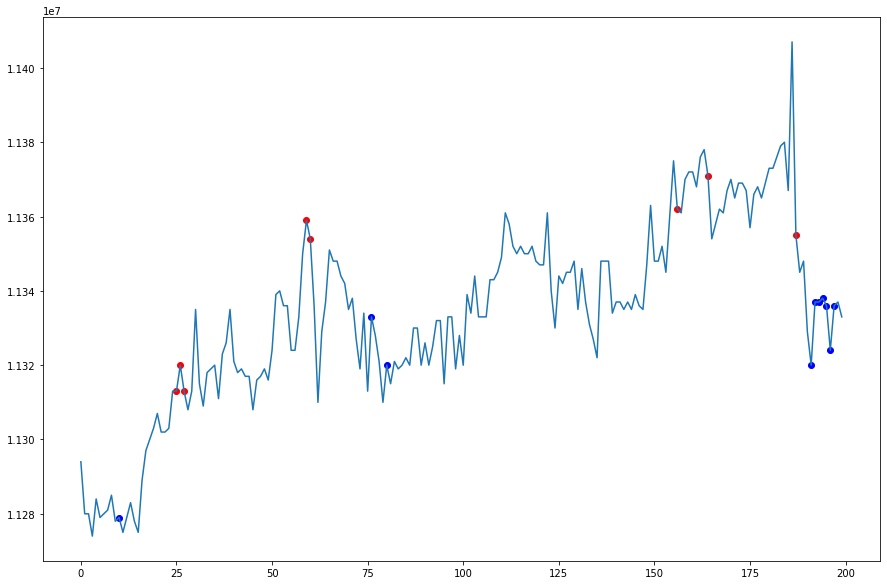

-0.3401360702518374

In [2]:
import pyupbit
import backtesting
import pandas as pd

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute1")
df = pd.DataFrame(df)

def bothFilter(data):
    return data['close'].rolling(window=10).mean()

def buyfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * 30000
    if ret>100:
        return 100
    elif ret<8:
        return 0
    return ret

def sellfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * -1 * 60000
    if ret>100:
        return 100
    elif ret<16:
        return 0
    return ret

backtesting.SIMULATION(df, bothFilter,bothFilter, buyfunc, sellfunc)